<a href="https://colab.research.google.com/github/Lopesg-Marcia/ml-regression/blob/main/Google_Ads_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [88]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from graphviz import Digraph
from IPython.display import Image

# Upload data

In [89]:
url = 'https://docs.google.com/spreadsheets/d/1jd3c7CpUC0pgSxLVYXSFncqVEea3hLOivc3MlNq-axo/gviz/tq?tqx=out:csv'

In [90]:
dataset = pd.read_csv(url)

In [91]:
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 1,727.0,10080,$1.00,7.21%,44,6.05%
1,Campaign 2,719.0,7986,$1.13,9.00%,43,5.98%
2,Campaign 3,290.0,3229,$1.14,8.98%,17,5.86%
3,Campaign 4,546.0,7272,$1.03,7.51%,32,5.86%
4,Campaign 5,273.0,3030,$1.03,9.01%,16,5.86%


# Initial Data Exploration

## Dataset

In [92]:
# Size
dataset.shape


(500, 7)

In [93]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign Name  500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    object 
 4   CTR            499 non-null    object 
 5   Conversions    500 non-null    int64  
 6   CVR            499 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB
None


In [94]:
# Visualize
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 1,727.0,10080,$1.00,7.21%,44,6.05%
1,Campaign 2,719.0,7986,$1.13,9.00%,43,5.98%
2,Campaign 3,290.0,3229,$1.14,8.98%,17,5.86%
3,Campaign 4,546.0,7272,$1.03,7.51%,32,5.86%
4,Campaign 5,273.0,3030,$1.03,9.01%,16,5.86%


## Attributes

In [95]:
# Removing unused attibutes
dataset = dataset.drop(['Campaign Name', 'CVR', 'CTR'], axis=1)

In [96]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  500 non-null    int64  
 2   CPC          499 non-null    object 
 3   Conversions  500 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB
None


In [97]:
dataset['Clicks'].describe()

,Clicks
count,499.000000
mean,589.042084
std,233.816528
min,202.000000
25%,376.500000
50%,583.000000
75%,780.000000
max,1000.000000


In [98]:
dataset['Impressions'].describe()

,Impressions
count,500.000000
mean,7089.748000
std,3700.703581
min,2004.000000
25%,4254.750000
50%,6358.000000
75%,8835.000000
max,19414.000000


In [99]:
dataset['CPC'].describe()

,CPC
count,499
unique,85
top,$0.69
freq,17


# Data Transformation

## Treat Incorrect Data Types

In [100]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  500 non-null    int64  
 2   CPC          499 non-null    object 
 3   Conversions  500 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB
None


### CPC

In [101]:
# Converting Object to Numeric
temp_cpc = pd.to_numeric(dataset['CPC'], errors='coerce')
print(temp_cpc.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: CPC, dtype: float64


In [102]:
# Replacing commas with periods
temp_cpc = dataset['CPC'].str.replace(',', '.', regex=True)
print(temp_cpc.head())

0    $1.00
1    $1.13
2    $1.14
3    $1.03
4    $1.03
Name: CPC, dtype: object


In [103]:
# Removing non-numeric characters such as symbols or spaces
temp_cpc = dataset['CPC'].str.replace('[^\d.]', '', regex=True)
print(temp_cpc.head())

0    1.00
1    1.13
2    1.14
3    1.03
4    1.03
Name: CPC, dtype: object


In [104]:
# Converting Object to Numeric
temp_cpc = pd.to_numeric(temp_cpc, errors='coerce')
print(temp_cpc.head())

0    1.00
1    1.13
2    1.14
3    1.03
4    1.03
Name: CPC, dtype: float64


In [105]:
dataset['CPC'] = temp_cpc
print(dataset['CPC'].head())

0    1.00
1    1.13
2    1.14
3    1.03
4    1.03
Name: CPC, dtype: float64


In [21]:
# Checking Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  500 non-null    int64  
 2   CPC          499 non-null    float64
 3   Conversions  500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB
None


# Data Exploration and Analysis

## Clicks

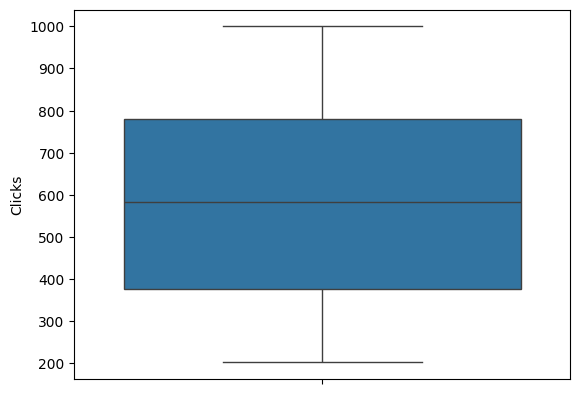

In [106]:
srn.boxplot(dataset['Clicks'])
plt.show()

<Axes: xlabel='Clicks', ylabel='Count'>

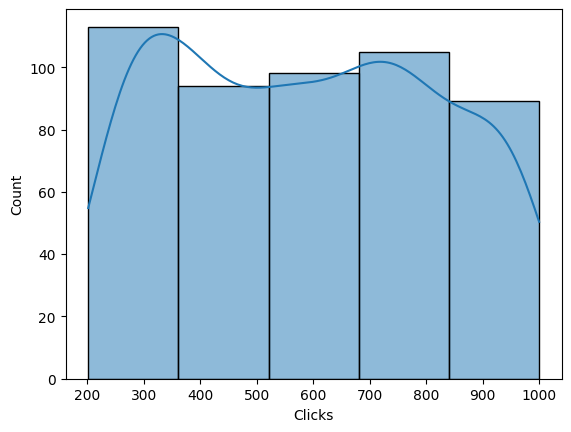

In [107]:
srn.histplot(dataset['Clicks'],bins=5,kde=True)

## Impressions

<Axes: ylabel='Impressions'>

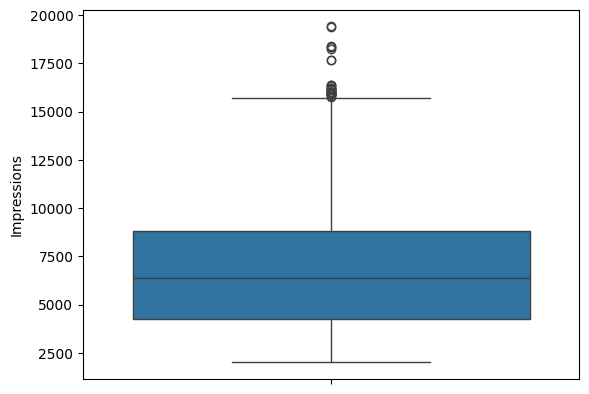

In [108]:
srn.boxplot(dataset['Impressions'])

<Axes: xlabel='Impressions', ylabel='Count'>

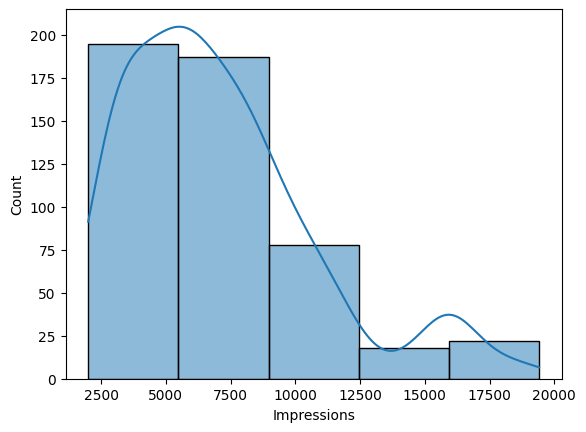

In [109]:
srn.histplot(dataset['Impressions'],bins=5,kde=True)

## CPC

<Axes: ylabel='CPC'>

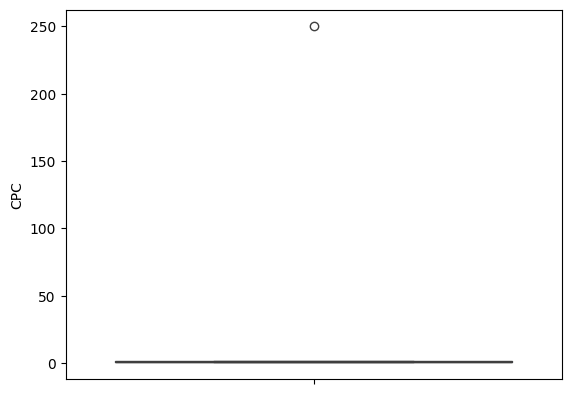

In [110]:
srn.boxplot(dataset['CPC'])

<Axes: xlabel='CPC', ylabel='Count'>

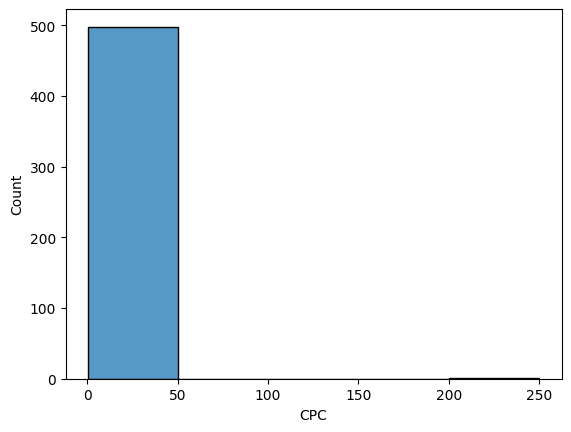

In [111]:
srn.histplot(dataset['CPC'],bins=5)

In [112]:
dataset['CPC'].describe()

,CPC
count,499.000000
mean,1.359960
std,11.155968
min,0.440000
25%,0.640000
50%,0.820000
75%,1.100000
max,250.000000


In [113]:
# Creating a temporary series to show Boxplot without Outliers
temp_cpc2 = dataset['CPC']
print(temp_cpc2.head())

0    1.00
1    1.13
2    1.14
3    1.03
4    1.03
Name: CPC, dtype: float64


In [114]:
Q1 = temp_cpc2.quantile(0.25)
Q3 = temp_cpc2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = temp_cpc2[(temp_cpc2 >= lower_bound) & (temp_cpc2 <= upper_bound)]

<Axes: ylabel='CPC'>

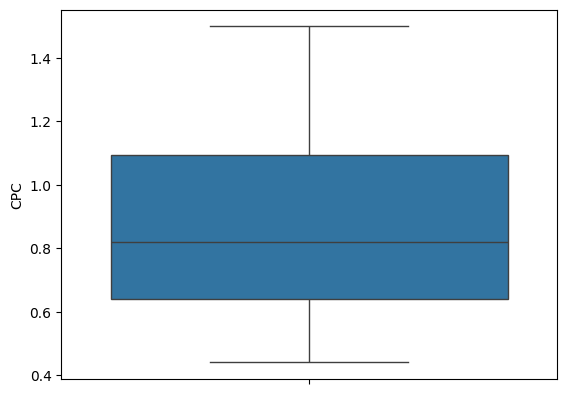

In [115]:
# Boxplot without Outliers
srn.boxplot(filtered_data)

<Axes: xlabel='CPC', ylabel='Count'>

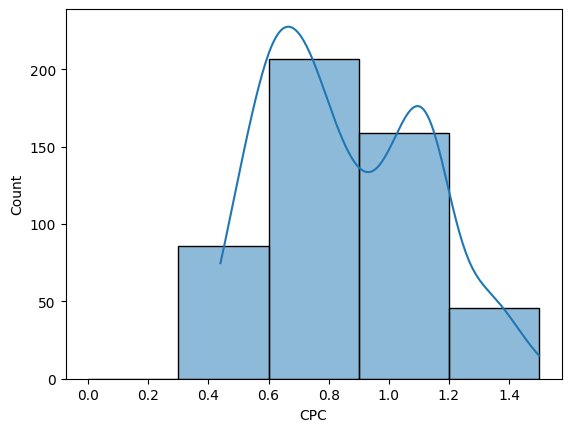

In [116]:
# Histogram without Outliers
bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
srn.histplot(filtered_data,bins=bins,kde=True)

## Conversions

<Axes: ylabel='Conversions'>

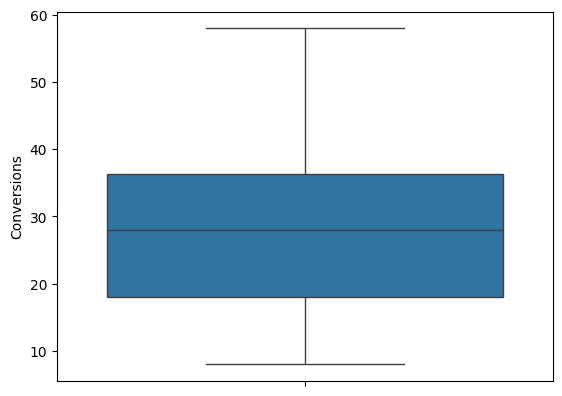

In [117]:
srn.boxplot(dataset['Conversions'])

<Axes: xlabel='Conversions', ylabel='Count'>

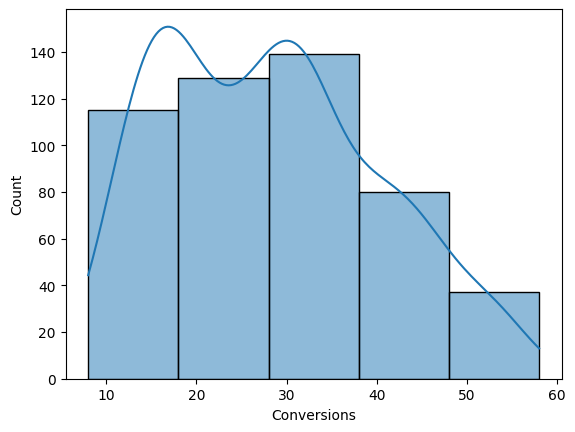

In [118]:
srn.histplot(dataset['Conversions'],bins=5,kde=True)

# Data Cleaning

## Treat Missing Values

In [119]:
# Check NAN
dataset.isnull().sum()

,0
Clicks,1
Impressions,0
CPC,1
Conversions,0


### Clicks

In [120]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_clicks = dataset['Clicks'].median()
dataset['Clicks'].fillna(mediana_clicks, inplace=True)

### CPC

In [37]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_cpc = dataset['CPC'].median()
dataset['CPC'].fillna(mediana_cpc, inplace=True)

## Treat Duplicate Values

In [121]:
#Checking for duplicates
dup = dataset.duplicated()
print(dup)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [122]:
num_dup = dataset.duplicated().sum()
print(num_dup)

1


## Treat Outliers

### Clicks

In [123]:
# Setting an ideal range
Q1 = dataset['Clicks'].quantile(0.25)
Q3 = dataset['Clicks'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_clicks = dataset[(dataset['Clicks'] < limite_inferior) | (dataset['Clicks'] > limite_superior)]
print(out_clicks)

Empty DataFrame
Columns: [Clicks, Impressions, CPC, Conversions]
Index: []


### Impressions

In [124]:
# Setting an ideal range
Q1 = dataset['Impressions'].quantile(0.25)
Q3 = dataset['Impressions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_imp = dataset[(dataset['Impressions'] < limite_inferior) | (dataset['Impressions'] > limite_superior)]
print(out_imp)

     Clicks  Impressions   CPC  Conversions
44    914.0        15883  0.75           52
54    957.0        18328  1.02           54
61    978.0        16209  0.78           55
108   980.0        16228  1.04           52
136   991.0        16332  0.50           51
137   974.0        16172  0.51           50
144   881.0        16004  0.56           45
162   854.0        15999  0.50           43
188   857.0        15999  0.63           41
206   997.0        19414  1.14           47
212   896.0        16144  0.63           42
215   962.0        15901  0.68           45
253   995.0        18230  0.76           45
266   868.0        15883  0.83           39
301   988.0        16374  1.03           43
321   984.0        18411  1.06           42
331   997.0        16388  0.58           42
336   936.0        15815  0.60           39
346   974.0        18328  1.37           40
382   929.0        15750  0.72           35
394   955.0        15994  0.59           32
395   869.0        15891  0.59  

### CPC

In [125]:
# Setting an ideal CPC range
Q1 = dataset['CPC'].quantile(0.25)
Q3 = dataset['CPC'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_cpc = dataset[(dataset['CPC'] < limite_inferior) | (dataset['CPC'] > limite_superior)]
print(out_cpc)


     Clicks  Impressions    CPC  Conversions
242   748.0        10241  250.0           34


In [126]:
# Removing Outliers
dataset_new = dataset[(dataset['CPC'] >= limite_inferior) & (dataset['CPC'] <= limite_superior)]
dataset_new.shape

(498, 4)

In [127]:
# Checking Adjusted CPC
dataset.shape
dataset['CPC'].describe()

,CPC
count,499.000000
mean,1.359960
std,11.155968
min,0.440000
25%,0.640000
50%,0.820000
75%,1.100000
max,250.000000


### Conversions

In [129]:
# Setting an ideal Conversions range
Q1 = dataset['Conversions'].quantile(0.25)
Q3 = dataset['Conversions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_conv = dataset[(dataset['Conversions'] < limite_inferior) | (dataset['Conversions'] > limite_superior)]
print(out_conv)

Empty DataFrame
Columns: [Clicks, Impressions, CPC, Conversions]
Index: []


# Machine Learning

In [131]:
print(dataset_new)

     Clicks  Impressions   CPC  Conversions
0     727.0        10080  1.00           44
1     719.0         7986  1.13           43
2     290.0         3229  1.14           17
3     546.0         7272  1.03           32
4     273.0         3030  1.03           16
..      ...          ...   ...          ...
495   561.0         4045  0.80           33
496   527.0         4924  0.80           31
497   664.0         6666  0.80           39
498   545.0         6826  0.80           32
499   358.0         3986  0.80           21

[498 rows x 4 columns]


## Defining Variables

In [132]:
X = dataset_new[['Clicks', 'Impressions', 'CPC']]
y = dataset_new['Conversions']

## Training and Test

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
scaler = StandardScaler()

In [135]:
X_train_scaled = scaler.fit_transform(X_train)

In [136]:
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [137]:
linear_model = LinearRegression()

In [138]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = linear_model.predict(X_test)

In [140]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [141]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

In [142]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coeficientes:\n", coefficients)
print("Intercepto:", linear_model.intercept_)

Mean Squared Error (MSE): 33.043839973645916
R² Score: 0.7411450807719473
Coeficientes:
              Coefficient
Clicks          0.046012
Impressions    -0.000128
CPC             1.363398
Intercepto: 0.9185003049007321


In [143]:
formula_linear = f"Y = {linear_model.intercept_:.4f}"
for i, coef in enumerate(linear_model.coef_):
    formula_linear += f" + {coef:.4f} * X{i + 1}"

In [144]:
print("Multiple Linear Regression:")
print(formula_linear)

Multiple Linear Regression:
Y = 0.9185 + 0.0460 * X1 + -0.0001 * X2 + 1.3634 * X3


## Ridge Model

In [145]:
ridge_model = Ridge(alpha=1.0)  # O parâmetro alpha controla a penalização
ridge_model.fit(X_train, y_train)


Ridge()

In [146]:
y_pred_ridge = ridge_model.predict(X_test)

In [147]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [148]:
print("Ridge Model:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R² Score:", r2_ridge)
print("Coefficient Ridge:\n", pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient']))
print("Intercepto Ridge:", ridge_model.intercept_)

Ridge Model:
Mean Squared Error (MSE): 33.02796315770247
R² Score: 0.741269454691925
Coefficient Ridge:
              Coefficient
Clicks          0.046007
Impressions    -0.000127
CPC             1.312691
Intercepto Ridge: 0.9608196718001452


In [149]:
formula_ridge = f"Y = {ridge_model.intercept_:.4f}"
for i, coef in enumerate(ridge_model.coef_):
    formula_ridge += f" + {coef:.4f} * X{i + 1}"

In [150]:
print("Ridge Model Formula:")
print(formula_ridge)

Ridge Model Formula:
Y = 0.9608 + 0.0460 * X1 + -0.0001 * X2 + 1.3127 * X3


## Lasso Model

In [151]:
lasso_model = Lasso(alpha=0.01)  # O parâmetro alpha controla a penalização
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [152]:
y_pred_lasso = lasso_model.predict(X_test)

In [153]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [154]:
print("Lasso Model:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R² Score:", r2_lasso)
print("Coeficientes Lasso:\n", pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient']))
print("Intercepto Lasso:", lasso_model.intercept_)

Lasso Model:
Mean Squared Error (MSE): 32.996728143418
R² Score: 0.7415141398467419
Coeficientes Lasso:
              Coefficient
Clicks          0.045995
Impressions    -0.000126
CPC             1.209639
Intercepto Lasso: 1.0469451104463623


In [71]:
formula_lasso = f"Y = {lasso_model.intercept_:.4f}"
for i, coef in enumerate(lasso_model.coef_):
    if coef != 0:  # Excluir características com coeficiente zero
        formula_lasso += f" + {coef:.4f} * X{i + 1}"

In [155]:
print("Lasso Model Formula:")
print(formula_lasso)

Lasso Model Formula:
Y = 1.7611 + 0.0456 * X1 + -0.0001 * X2 + -0.0049 * X3


## Model Formulas

In [156]:
print("Formulas:")
print("Multiple Regression:",formula_linear)
print("Ridge Regression:",formula_ridge)
print("Lasso Regression:",formula_lasso)

Formulas:
Multiple Regression: Y = 0.9185 + 0.0460 * X1 + -0.0001 * X2 + 1.3634 * X3
Ridge Regression: Y = 0.9608 + 0.0460 * X1 + -0.0001 * X2 + 1.3127 * X3
Lasso Regression: Y = 1.7611 + 0.0456 * X1 + -0.0001 * X2 + -0.0049 * X3


## Data Input and Results


### Data Input

In [157]:
data_input = pd.DataFrame({
    'Clicks': [50],        # Número de cliques
    'Impressions': [1000],  # Número de impressões
    'CPC': [1],           # Custo por clique
})

### Linear Regression Results

In [158]:
linear_prediction = linear_model.predict(data_input)

In [159]:
print(f"Predicted Conversions - Multiple Regression: {linear_prediction[0]:.2f}")

Predicted Conversions - Multiple Regression: 4.45


### Ridge Regression Results

In [160]:
ridge_prediction = ridge_model.predict(data_input)


In [161]:
print(f"Predicted Conversions - Ridge: {ridge_prediction[0]:.2f}")

Predicted Conversions - Ridge: 4.45


### Lasso Regression Results

In [162]:
lasso_prediction = lasso_model.predict(data_input)

In [163]:
print(f"Predicted Conversions - Lasso: {lasso_prediction[0]:.2f}")

Predicted Conversions - Lasso: 4.43


## User Data Input and Results

In [164]:
# User Input
user_input = []
for column in X.columns:
    value = float(input(f"Digite o valor para {column}: "))
    user_input.append(value)

Digite o valor para Clicks: 200
Digite o valor para Impressions: 1800
Digite o valor para CPC: 1


## Input

In [165]:
input_df = pd.DataFrame([user_input], columns=X.columns)

In [166]:
linear_prediction = linear_model.predict(input_df)[0]
ridge_prediction = ridge_model.predict(input_df)[0]
lasso_prediction = lasso_model.predict(input_df)[0]

### Results

In [167]:
print("\nPredictions Results:")
print(f"Multiple Linear Regression Prediction: {linear_prediction:.2f}")
print(f"Ridge Regression Prediction: {ridge_prediction:.2f}")
print(f"Lasso Regression Prediction: {lasso_prediction:.2f}")


Predictions Results:
Multiple Linear Regression Prediction: 11.25
Ridge Regression Prediction: 11.25
Lasso Regression Prediction: 11.23


## Models Evaluation

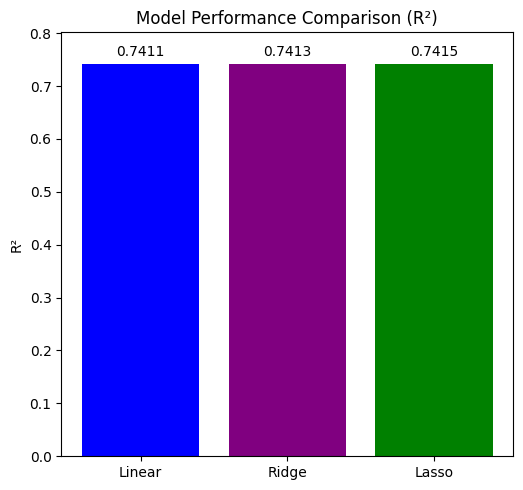

In [168]:
models = ['Linear', 'Ridge', 'Lasso']
mse_values = [mse, mse_ridge, mse_lasso]
r2_values = [r2, r2_ridge, r2_lasso]

x = range(len(models))

plt.figure(figsize=(10, 5))

# Bar chart for R² Score
plt.subplot(1, 2, 1)
bars = plt.bar(x, r2_values, color=['blue', 'purple', 'green'])
# Add labels on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,  # Position above the bar
             f'{r2_values[i]:.4f}',  # Display the R² value with 4 decimal places
             ha='center', va='bottom')  # Center horizontally, place above the bar
plt.xticks(x, models)
plt.ylabel('R²')
plt.title('Model Performance Comparison (R²)')
plt.ylim(0, max(r2_values) + 0.06)  # Adjust the upper limit of the y-axi
plt.tight_layout()
plt.show()


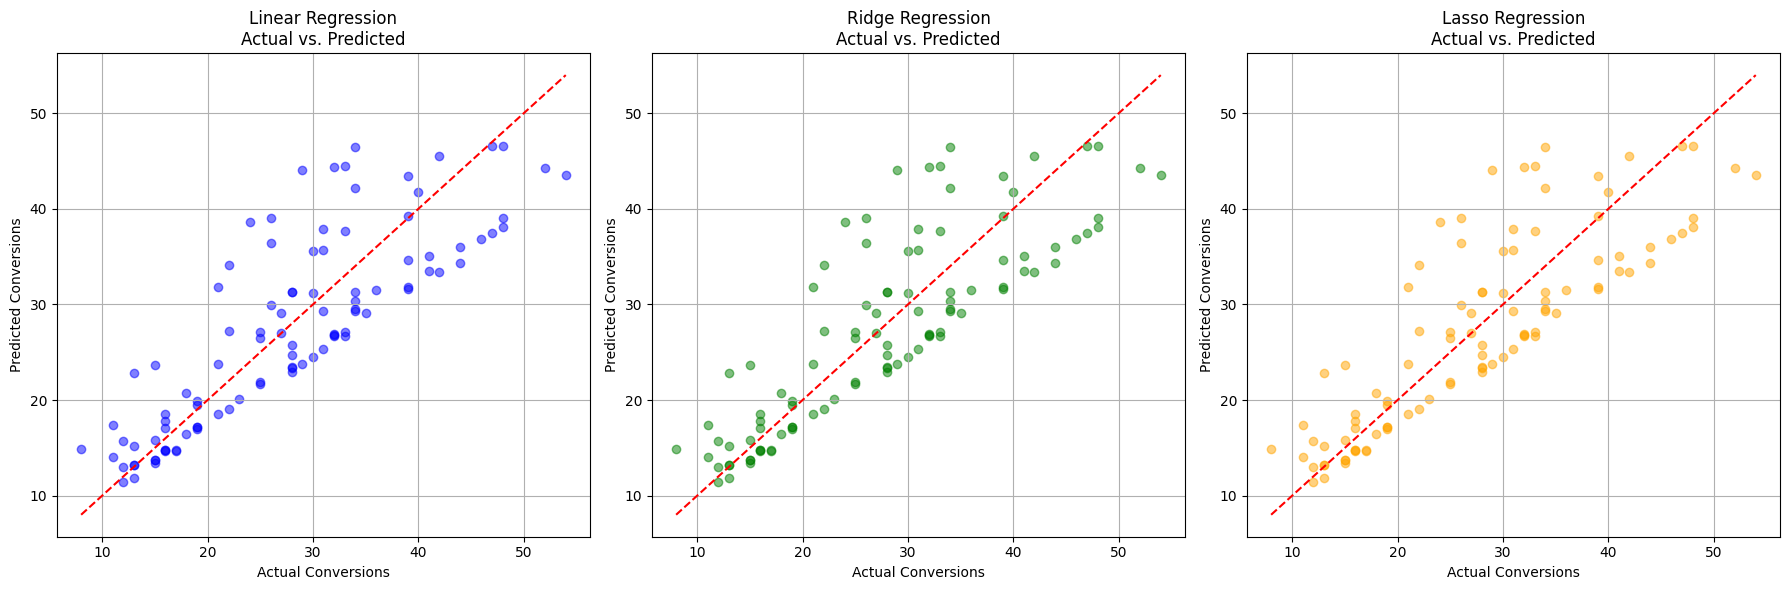

In [86]:
# Create scatter plots for each model
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.title('Linear Regression\nActual vs. Predicted')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.grid()

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.title('Ridge Regression\nActual vs. Predicted')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.grid()

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.title('Lasso Regression\nActual vs. Predicted')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.grid()

plt.tight_layout()
plt.show()


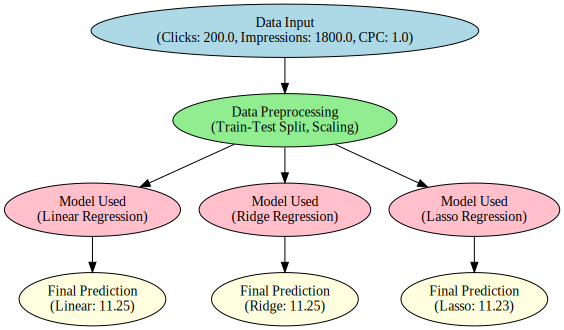

In [169]:
# Get the input values for the flowchart
clicks = input_df['Clicks'].values[0]
impressions = input_df['Impressions'].values[0]
cpc = input_df['CPC'].values[0]

dot = Digraph()

# Add the blocks with different colors
dot.node('A', f'Data Input\n(Clicks: {clicks}, Impressions: {impressions}, CPC: {cpc})', shape='ellipse', style='filled', fillcolor='lightblue')
dot.node('B', 'Data Preprocessing\n(Train-Test Split, Scaling)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('C1', 'Model Used\n(Linear Regression)', shape='ellipse', style='filled', fillcolor='pink')
dot.node('C2', 'Model Used\n(Ridge Regression)', shape='ellipse', style='filled', fillcolor='pink')
dot.node('C3', 'Model Used\n(Lasso Regression)', shape='ellipse', style='filled', fillcolor='pink')
dot.node('D1', f'Final Prediction\n(Linear: {linear_prediction:.2f})', shape='ellipse', style='filled', fillcolor='lightyellow')
dot.node('D2', f'Final Prediction\n(Ridge: {ridge_prediction:.2f})', shape='ellipse', style='filled', fillcolor='lightyellow')
dot.node('D3', f'Final Prediction\n(Lasso: {lasso_prediction:.2f})', shape='ellipse', style='filled', fillcolor='lightyellow')

# Add the arrows between blocks
dot.edge('A', 'B')
dot.edge('B', 'C1')
dot.edge('B', 'C2')
dot.edge('B', 'C3')
dot.edge('C1', 'D1')
dot.edge('C2', 'D2')
dot.edge('C3', 'D3')

# Display the diagram inline
display(dot)